# Tread Lightly - A Code to apply logistic regression to the ZFIRE kinematic dataset
Named after the Mastodon song, Tread Lightly, off of the album Once More 'Round the Sun:
Open your eyes
Take a deep breath and return to life
Wake up and fight
Fight for the love and the burning light

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [3]:
galaxies = pd.read_table('zfire_recovered090517_rtltrs_MCMC.cat',delim_whitespace=True)
galaxies['diskbin'] = np.where(galaxies.disk == True, 1, 0)
galaxies.head()

,zid,mask,zspec,mass,cluster,disk,compact,sfr,va,va_err,...,j,j_err,sersic,sersic_err,size_e,size_s,size_t,r_ratio,sfr_density,diskbin
0,2765,dec2013_mask1,2.23,10.44,False,False,False,83.3,273.33,9.53,...,656.51,27.79,4.00,0.00,2.81,1.43,1.33,0.93,3.36,0
1,3074,dec2013_mask1,2.23,10.19,False,False,False,-99.0,224.80,19.77,...,705.83,33.34,1.00,0.00,3.79,2.58,1.46,0.57,-99.00,0
2,3532,dec2013_mask1,2.10,9.40,True,False,False,9.9,17.55,9.61,...,16.00,8.84,0.86,0.09,1.67,0.51,0.30,0.58,1.14,0
3,3842,dec2013_mask1,2.10,10.25,True,True,False,8.8,251.36,23.80,...,838.88,49.05,0.87,0.04,3.58,3.18,1.59,0.50,0.22,1
4,4655,dec2013_mask1,2.10,9.34,True,True,True,1.2,134.39,30.26,...,112.57,19.59,0.59,0.17,0.99,1.21,0.60,0.49,0.39,1


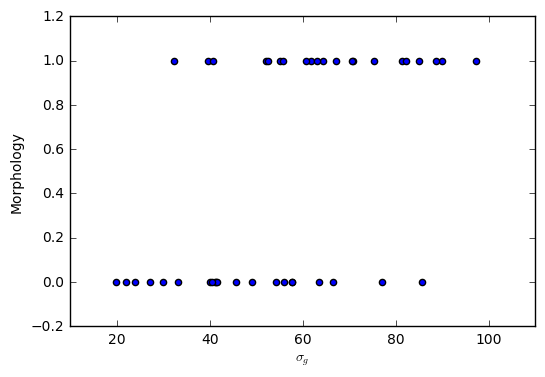

In [4]:
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Morphology')

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['sig']
X = galaxies[feature_cols]
y = galaxies.diskbin
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# make predictions for all values of X
galaxies['morph_pred'] = linreg.predict(X)
galaxies.head()

,zid,mask,zspec,mass,cluster,disk,compact,sfr,va,va_err,...,j_err,sersic,sersic_err,size_e,size_s,size_t,r_ratio,sfr_density,diskbin,morph_pred
0,2765,dec2013_mask1,2.23,10.44,False,False,False,83.3,273.33,9.53,...,27.79,4.00,0.00,2.81,1.43,1.33,0.93,3.36,0,0.758858
1,3074,dec2013_mask1,2.23,10.19,False,False,False,-99.0,224.80,19.77,...,33.34,1.00,0.00,3.79,2.58,1.46,0.57,-99.00,0,0.628085
2,3532,dec2013_mask1,2.10,9.40,True,False,False,9.9,17.55,9.61,...,8.84,0.86,0.09,1.67,0.51,0.30,0.58,1.14,0,0.475206
3,3842,dec2013_mask1,2.10,10.25,True,True,False,8.8,251.36,23.80,...,49.05,0.87,0.04,3.58,3.18,1.59,0.50,0.22,1,0.294136
4,4655,dec2013_mask1,2.10,9.34,True,True,True,1.2,134.39,30.26,...,19.59,0.59,0.17,0.99,1.21,0.60,0.49,0.39,1,0.203973


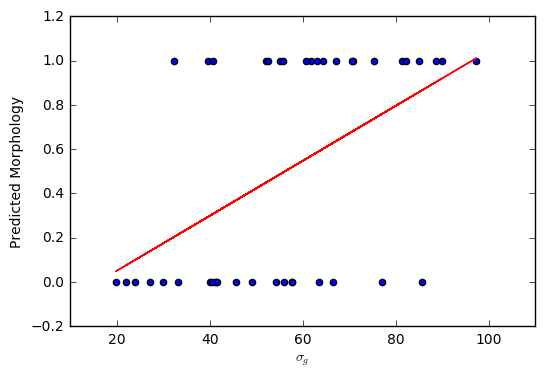

In [7]:
# plot those predictions connected by a line
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.plot(galaxies.sig, galaxies.morph_pred, color='red')
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Predicted Morphology')

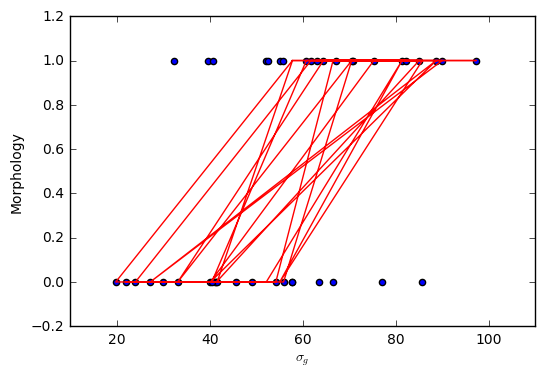

In [8]:
#Using Logistic Regression Instead
#Logistic regression can do what we just did:

# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['sig']
X = galaxies[feature_cols]
y = galaxies.diskbin
logreg.fit(X, y)
galaxies['morph_pred_class'] = logreg.predict(X)
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.plot(galaxies.sig, galaxies.morph_pred_class, color='red')
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Morphology')

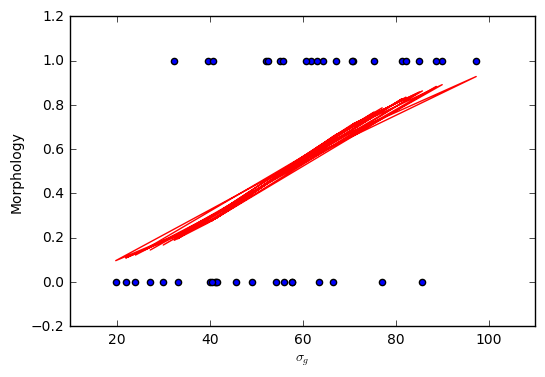

In [9]:
#What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

# store the predicted probabilites of class 1
galaxies['morph_pred_prob'] = logreg.predict_proba(X)[:, 1]
# plot the predicted probabilities
plt.scatter(galaxies.sig, galaxies.diskbin)
plt.plot(galaxies.sig, galaxies.morph_pred_prob, color='red')
plt.xlabel(r'$\sigma_g$')
plt.ylabel('Morphology')

In [10]:
print(logreg.predict_proba(50))
print(logreg.predict_proba(25))
print(logreg.predict_proba(85))

[[ 0.59193507  0.40806493]]
[[ 0.87189831  0.12810169]]
[[ 0.14279608  0.85720392]]
